In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
#Generating dataset
(a,b) = (6,5)
stdd_y = 1.4
Y = 150
np.random.seed(3)
y_a = np.random.randn(Y) * stdd_y + a
y_b = np.random.randn(Y) * stdd_y + b

(c,d) = (2,3)
stdd_N = 1.0
N = 120
N_a = np.random.randn(N) * stdd_N + c
N_b = np.random.randn(N) * stdd_N + d

In [10]:
#Concatenating the data
data = []
for i in range(Y):
    row = []
    row.append(y_a[i]) #Appending Mary's rating for "Yes"
    row.append(y_b[i]) #Appending John's rating for "Yes"
    row.append(1) #1 for YES
    data.append(row)
#Appending NO data
for i in range(N):
    row = []
    row.append(N_a[i]) #Appending Mary's rating for "No"
    row.append(N_b[i]) #Appending John's rating for "No"
    row.append(0) #0 for NO
    data.append(row)

np.random.shuffle(data)
X = []
y = []
for i in range(len(data)):
    X.append(data[i][:2])
    y.append(data[i][2])


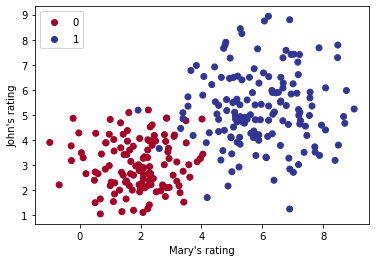

In [45]:
fig, ax = plt.subplots()
scatter = ax.scatter(np.asarray(X).T[0],np.asarray(X).T[1], c = y, cmap =plt.cm.RdYlBu);
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left")
ax.add_artist(legend1)
plt.xlabel("Mary's rating")
plt.ylabel("John's rating")
plt.show()

In [11]:
#Splitting data for train and test
p  = int(len(data)*0.8) #80% training 20% test ratio
training_data, test_data = np.asarray(data[:p]), np.asarray(data[p:])
X_train, X_test, y_train, y_test = np.asarray(X[:p]), np.asarray(X[p:]), np.asarray(y[:p]), np.asarray(y[p:])
y_train, y_test = y_train.reshape(len(y_train), 1), y_test.reshape(len(y_test), 1)


In [84]:
def summation(inputs, weights, bias):
    return np.dot(inputs, weights) + bias
    
def sigmoid(weighted_sum):
    return 1.0 / (1.0 + np.exp(-weighted_sum)) 

    
def sum_of_squares(y_train, y_predict):
    return np.sum((y_train - y_predict)**2)

def accuracy(y_train, y_predict):
    count = 0
    count_no, count_yes = 0, 0
    n = len(y_train)
    n_no, n_yes = 0, 0
    acc_yes, acc_no = 0, 0
    for i in range(n):
        if y_train[i] == [0]: n_no += 1
        else: n_yes += 1
        if (y_predict[i] < 0.5 and y_train[i] == [0]):
            count += 1   
            count_no += 1
        elif (y_predict[i] >= 0.5 and y_train[i] == [1]):
            count += 1 
            count_yes += 1
    acc = count / n * 100
    if n_no != 0 and n_yes!=0:
        acc_yes = count_yes / n_yes * 100
        acc_no = count_no / n_no * 100
    return acc, acc_yes, acc_no

In [79]:
#Batch Gradient 
def gradient_descent(num_iter, X_train, y_train, learning_rate):
    m = X_train.shape[0]
    input_layer_size = X_train.shape[1]
    output_layer_size = y_train.shape[1]
    np.random.seed(1)
    weights = np.random.random((input_layer_size,output_layer_size))
    bias = 0
    error = []
    W = []
    acc = []
    acc_yes, acc_no = 0, 0
    for i in range(num_iter):
        W.append(weights)
        Z = summation(X_train, weights, bias)
        A = sigmoid(Z)
        diff = sum_of_squares(y_train, A)
        error.append(diff)
        dZ = 2 * (A - y_train) * (1 - A) * A
        dW = (1/m) * np.dot(X_train.T, dZ)
        dB = (1/m) * np.sum(dZ)
        weights = weights - learning_rate * dW
        bias = bias - learning_rate * dB
        accur, acc_yes, acc_no = accuracy(y_train, A)
        acc.append(accur)
    return error, W, acc, acc_yes, acc_no

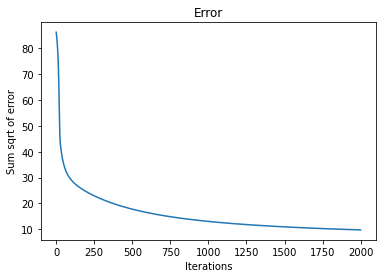

In [81]:
learning_rate = 0.1
num_iter = 2000
error, W, acc, acc_yes, acc_no = gradient_descent(num_iter, X_train, y_train, learning_rate)
#Iteration vs Error plot
itr = [i for i in range(num_iter)]
plt.plot(itr, error)
plt.xlabel("Iterations")
plt.ylabel("Sum sqrt of error")
plt.title("Error")
plt.show()

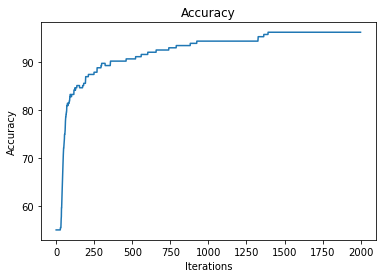

In [82]:
#Iteration vs Accuracy
itr = [i for i in range(num_iter)]
plt.plot(itr, acc)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.show()

(2000, 2, 1)


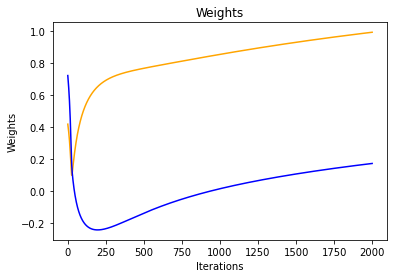

In [85]:
#Weights
itr = [i for i in range(num_iter)]
W = np.asarray(W)
plt.plot(itr, W.T[0][0], color = 'orange')
plt.plot(itr, W.T[0][1], color = 'blue')
plt.xlabel("Iterations")
plt.ylabel("Weights")
plt.title("Weights")
plt.show()

In [65]:
print("BGD \ -------Accuracy by class-------------\ No:{0:.2f}% Yes:{1:.2f}%".format(acc_no, acc_yes))

BGD \ -------Accuracy by class-------------\ No:95.88% Yes:96.64%


In [85]:
def accuracy_SGD(y_train, y_predict):
    count = 0
    n = len(y_train)
    for i in range(n):
        if (y_predict[i] < 0.5 and y_train[i] == [0]) or (y_predict[i] >= 0.5 and y_train[i] == [1]):
            count += 1   
    acc = count / n * 100
    return acc

In [86]:
def SGD(train_data, epoch, learning_rate):
    m = train_data.shape[0]
    error_history = []
    W = []
    acc = []
    acc_yes, acc_no = 0, 0
    weights = np.random.randn(2,1)
    bias = np.random.randn(1,1)
    error = 0.0
    accur = 0
    n_no, n_yes, count_no, count_yes = 0, 0, 0, 0
    for i in range(epoch):
        np.random.shuffle(train_data)
        X_train = train_data.T[:2].T #extracting x features from the dataset
        y_train = train_data.T[2].T.reshape(m, 1) #extracting y features from the dataset
        j = np.random.randint(0, m) #random index
        sample_x = X_train[j].reshape(1,2)
        sample_y = y_train[j].reshape(1,1)
        
        Z = summation(sample_x, weights, bias)
        A = sigmoid(Z)
        error += np.sum(np.square(sample_y - A))
        dZ = 2 * (A - sample_y) * (1 - A) * A
        dW = (1/m) * np.dot(sample_x.T, dZ)
        dB = (1/m) * np.sum(dZ)
    
        weights = weights - learning_rate * dW
        bias = bias - learning_rate * dB
        
        sample_accuracy = accuracy_SGD(sample_y, A)
        accur += sample_accuracy 
        if sample_y == [0]: n_no += 1
        else: n_yes += 1
        if (A < 0.5 and sample_y == 0):
            count_no += 1
        elif (A >= 0.5 and sample_y == 1):
            count_yes += 1
        
        if i!=0 and i%50==0: # at every 50th iteration record the cost, accuracy and weight values
            error_history.append(error)
            error = 0.0
            W.append(weights)
            acc.append(accur/i)
    if n_no != 0 and n_yes!=0:
        acc_yes = count_yes / n_yes * 100
        acc_no = count_no / n_no * 100
    return error_history, W, bias, acc, acc_yes, acc_no

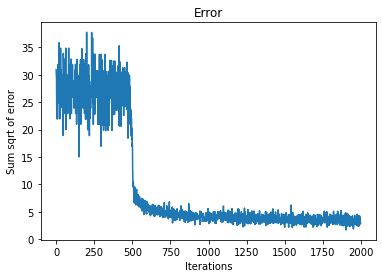

[[ 0.78983993]
 [-0.02091081]]
[[-2.63236343]]


In [154]:
# learning_rate = 0.1
epoch = 100000
error, W, bias, acc, acc_yes, acc_no = SGD(training_data, epoch, learning_rate)
scaled_epoch = int(epoch/50-1) #reducing epoch value to align with the y-axis
#Iteration vs Error plot
itr = [i for i in range(scaled_epoch)]
plt.plot(itr, error)
plt.xlabel("Iterations")
plt.ylabel("Sum sqrt of error")
plt.title("Error")
plt.show()
print(W[-1])
print(bias)

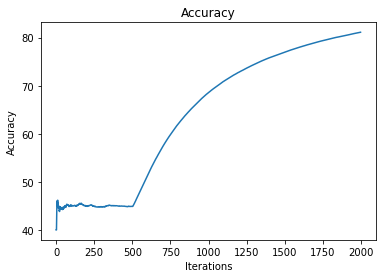

In [155]:
#Iteration vs Accuracy
itr = [i for i in range(scaled_epoch)]
plt.plot(itr, acc)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.show()


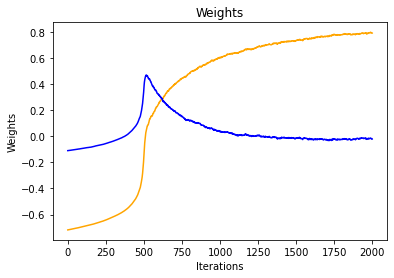

In [156]:
#Weights
itr = [i for i in range(scaled_epoch)]
W = np.asarray(W)
plt.plot(itr, W.T[0][0], color = 'orange')
plt.plot(itr, W.T[0][1], color = 'blue')
plt.xlabel("Iterations")
plt.ylabel("Weights")
plt.title("Weights")
plt.show()

In [158]:
print("SGD \ -------Accuracy by class-------------\ No:{0:.2f}% Yes:{1:.2f}%".format(acc_no, acc_yes))

SGD \ -------Accuracy by class-------------\ No:91.93% Yes:72.24%


Questions
Which one is 'smoother' and why is that?
- The Batch Gradient Descent is smoother because it produces the whole batch of the dataset at once
Which one converges faster and why is that?
- Stochastic Gradiend Descent is faster because it updates the value of weights and biases through only one random sample chosen without treating the whole inputs and outputs as one big matrix
What happens to the weights as the algorithm converges?
- The weights will not change much and stabilize
What is the difference between SGD, BGD and Mini BGD?
- The BGD processes all the training examples for each iteration, whereas Mini BGD divides the training set into a certain-sized mini batches and processes them, but the SGD selects one random example and processes it for each iteration. 

# Test Dataset

In [97]:
error_test, W_test, acc_test, acc_yes_test, acc_no_test = gradient_descent(2000, X_test, y_test, learning_rate)

In [98]:
print("SGD \ -------Overall Accuracy-------------\{0:.2f}%".format(acc_test[-1]))
print("BGD \ -------Accuracy by class-------------\ No:{0:.2f}% Yes:{1:.2f}%".format(acc_no_test, acc_yes_test))

SGD \ -------Overall Accuracy-------------\98.15%
BGD \ -------Accuracy by class-------------\ No:95.65% Yes:100.00%


In [92]:
epoch = 100000
learning_rate = 0.1
error_test2, W_test2, bias_test2, acc_test2, acc_yes_test2, acc_no_test2 = SGD(test_data, epoch, learning_rate)

In [96]:
print("SGD \ -------Overall Accuracy-------------\{0:.2f}%".format(acc_test2[-1]))
print("SGD \ -------Accuracy by class-------------\ No:{0:.2f}% Yes:{1:.2f}%".format(acc_no_test2, acc_yes_test2))

SGD \ -------Overall Accuracy-------------\97.33%
SGD \ -------Accuracy by class-------------\ No:94.38% Yes:99.52%


# Part 2: Show results for varied dataset

In [75]:
#Generating balanced, Log-Normal distributied dataset
(i,j) = (9,8)
stdd_y2 = 0.4
Y2 = 200 
np.random.seed(3)
y_a2 = np.random.gamma(i, stdd_y2, Y2)
y_b2 = np.random.gamma(j, stdd_y2, Y2)

(k,l) = (1,2)
stdd_N2 = 0.7
N2 = 200 
N_a2 = np.random.gamma(k, stdd_N2, N2)
N_b2 = np.random.gamma(l, stdd_N2, N2)

In [76]:
#Concatenating the data
data2 = []
for i in range(Y2):
    row = []
    row.append(y_a2[i]) #Appending Mary's rating for "Yes"
    row.append(y_b2[i]) #Appending John's rating for "Yes"
    row.append(1) #1 for YES
    data2.append(row)
#Appending NO data
for i in range(N2):
    row = []
    row.append(N_a2[i]) #Appending Mary's rating for "No"
    row.append(N_b2[i]) #Appending John's rating for "No"
    row.append(0) #0 for NO
    data2.append(row)

np.random.shuffle(data2)
X2 = []
y2 = []
for i in range(len(data2)):
    X2.append(data2[i][:2])
    y2.append(data2[i][2])
    
    
#Splitting data for train and test
p2  = int(len(data)*0.8) #80% training 20% test ratio
training_data2, test_data2 = np.asarray(data2[:p2]), np.asarray(data2[p2:])
X_train2, X_test2, y_train2, y_test2 = np.asarray(X2[:p2]), np.asarray(X2[p2:]), np.asarray(y2[:p2]), np.asarray(y2[p2:])
y_train2, y_test2 = y_train2.reshape(len(y_train2), 1), y_test2.reshape(len(y_test2), 1)


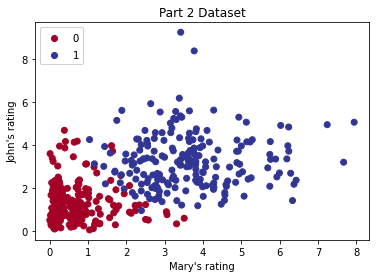

In [77]:
fig, ax = plt.subplots()
scatter = ax.scatter(np.asarray(X2).T[0],np.asarray(X2).T[1], c = y2, cmap =plt.cm.RdYlBu);
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left")
ax.add_artist(legend1)
plt.xlabel("Mary's rating")
plt.ylabel("John's rating")
plt.title("Part 2 Dataset")
plt.show()

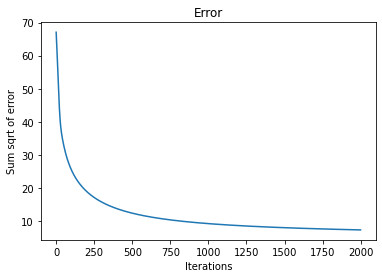

In [80]:
learning_rate = 0.1
num_iter = 2000
error2, W2, acc2, acc_yes2, acc_no2 = gradient_descent(num_iter, X_train2, y_train2, learning_rate)
#Iteration vs Error plot
itr = [i for i in range(num_iter)]
plt.plot(itr, error2)
plt.xlabel("Iterations")
plt.ylabel("Sum sqrt of error")
plt.title("Error")
plt.show()

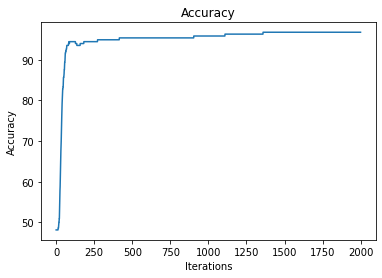

In [81]:
#Iteration vs Accuracy
itr = [i for i in range(num_iter)]
plt.plot(itr, acc2)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.show()

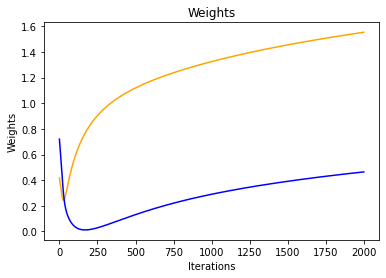

In [82]:
#Weights
itr = [i for i in range(num_iter)]
W2 = np.asarray(W2)
plt.plot(itr, W2.T[0][0], color = 'orange')
plt.plot(itr, W2.T[0][1], color = 'blue')
plt.xlabel("Iterations")
plt.ylabel("Weights")
plt.title("Weights")
plt.show()

In [83]:
print("BGD \ -------Accuracy by class-------------\ No:{0:.2f}% Yes:{1:.2f}%".format(acc_no2, acc_yes2))

BGD \ -------Accuracy by class-------------\ No:95.54% Yes:98.08%
